In [1]:
 import pandas as pd

In [3]:
df=pd.read_csv('IRIS.csv')

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.shape

(150, 5)

In [9]:
df.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


<AxesSubplot:xlabel='sepal_length'>

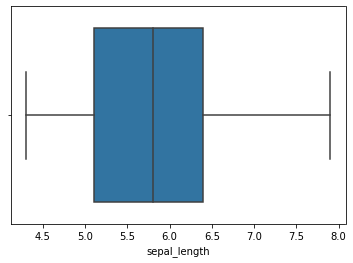

In [13]:
import seaborn as sns
sns.boxplot(df['sepal_length'])

<AxesSubplot:xlabel='sepal_width'>

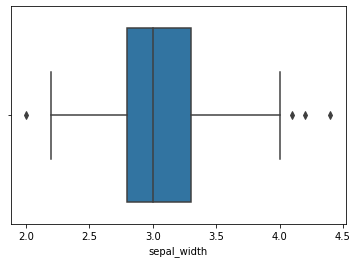

In [19]:
sns.boxplot(df['sepal_width'])

In [20]:
q1 = df['sepal_width'].quantile(0.25)
print(q1)

2.8


In [21]:
q3 = df['sepal_width'].quantile(0.75)
q3

3.3

In [22]:
IQR = q3-q1
IQR

0.5

In [23]:
lowerBound = q1 -(1.5*IQR)
print(lowerBound)
upperBound = q3 + (1.5*IQR)
print(upperBound)

2.05
4.05


<AxesSubplot:xlabel='sepal_width'>

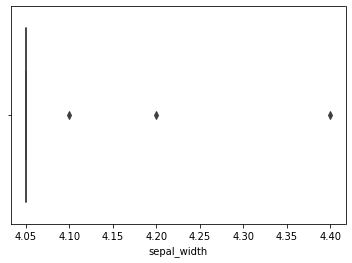

In [24]:
import numpy as np
df['sepal_width']=np.where(df['sepal_width']<upperBound,upperBound,df['sepal_width'])
sns.boxplot(df['sepal_width'])

<AxesSubplot:xlabel='petal_length'>

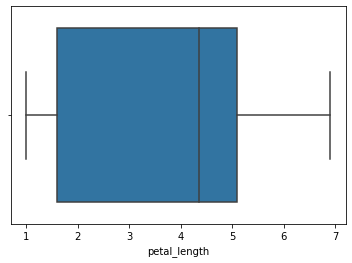

In [25]:
sns.boxplot(df['petal_length'])

<AxesSubplot:xlabel='petal_width'>

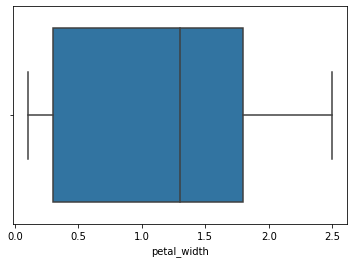

In [26]:
sns.boxplot(df['petal_width'])

C:\Users\haris\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


<AxesSubplot:xlabel='species'>

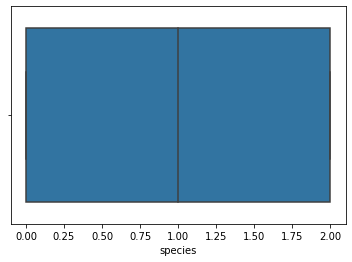

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species']=le.fit_transform(df[['species']])
sns.boxplot(df['species'])

In [29]:
df = pd.DataFrame(df)


In [32]:
x = df.drop(columns = ['species'], axis = 1)
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,4.05,1.4,0.2
1,4.9,4.05,1.4,0.2
2,4.7,4.05,1.3,0.2
3,4.6,4.05,1.5,0.2
4,5.0,4.05,1.4,0.2
...,...,...,...,...
145,6.7,4.05,5.2,2.3
146,6.3,4.05,5.0,1.9
147,6.5,4.05,5.2,2.0
148,6.2,4.05,5.4,2.3


In [34]:
y = df['species']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [39]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

In [40]:
scaler =Scaler.fit_transform(df)

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5, random_state=42)

In [61]:
x_test.shape

(75, 4)

In [62]:
x_train.shape

(75, 4)

In [44]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [45]:
y_pred = dtc.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [48]:
dtc.predict([[151,0.5,1,2]])

array([2])

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

1.0

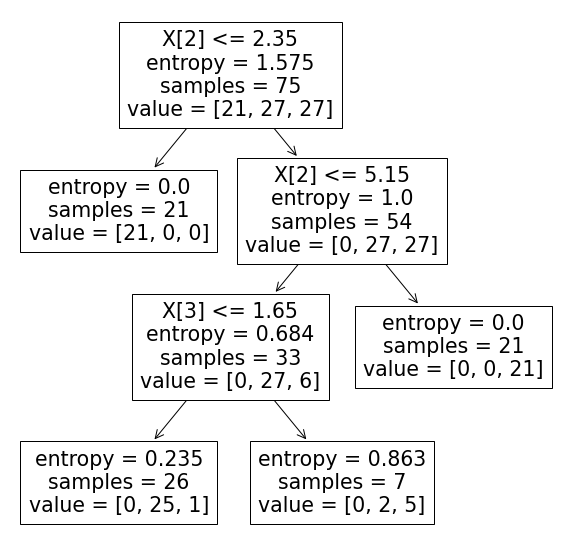

In [65]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(dtc.fit(x_train,y_train))
plt.show()